## World Happiness Report Project
## Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df1.shape

(158, 12)

In [6]:
df1.isna()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df1.isnull().sum().sum()

0

In [9]:
df1.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

here we notic that two object data type , one interger and rest are folat data types.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

no null value in the dataset.

In [11]:
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
#from sklearn.pyplot import sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Graphical Analysis

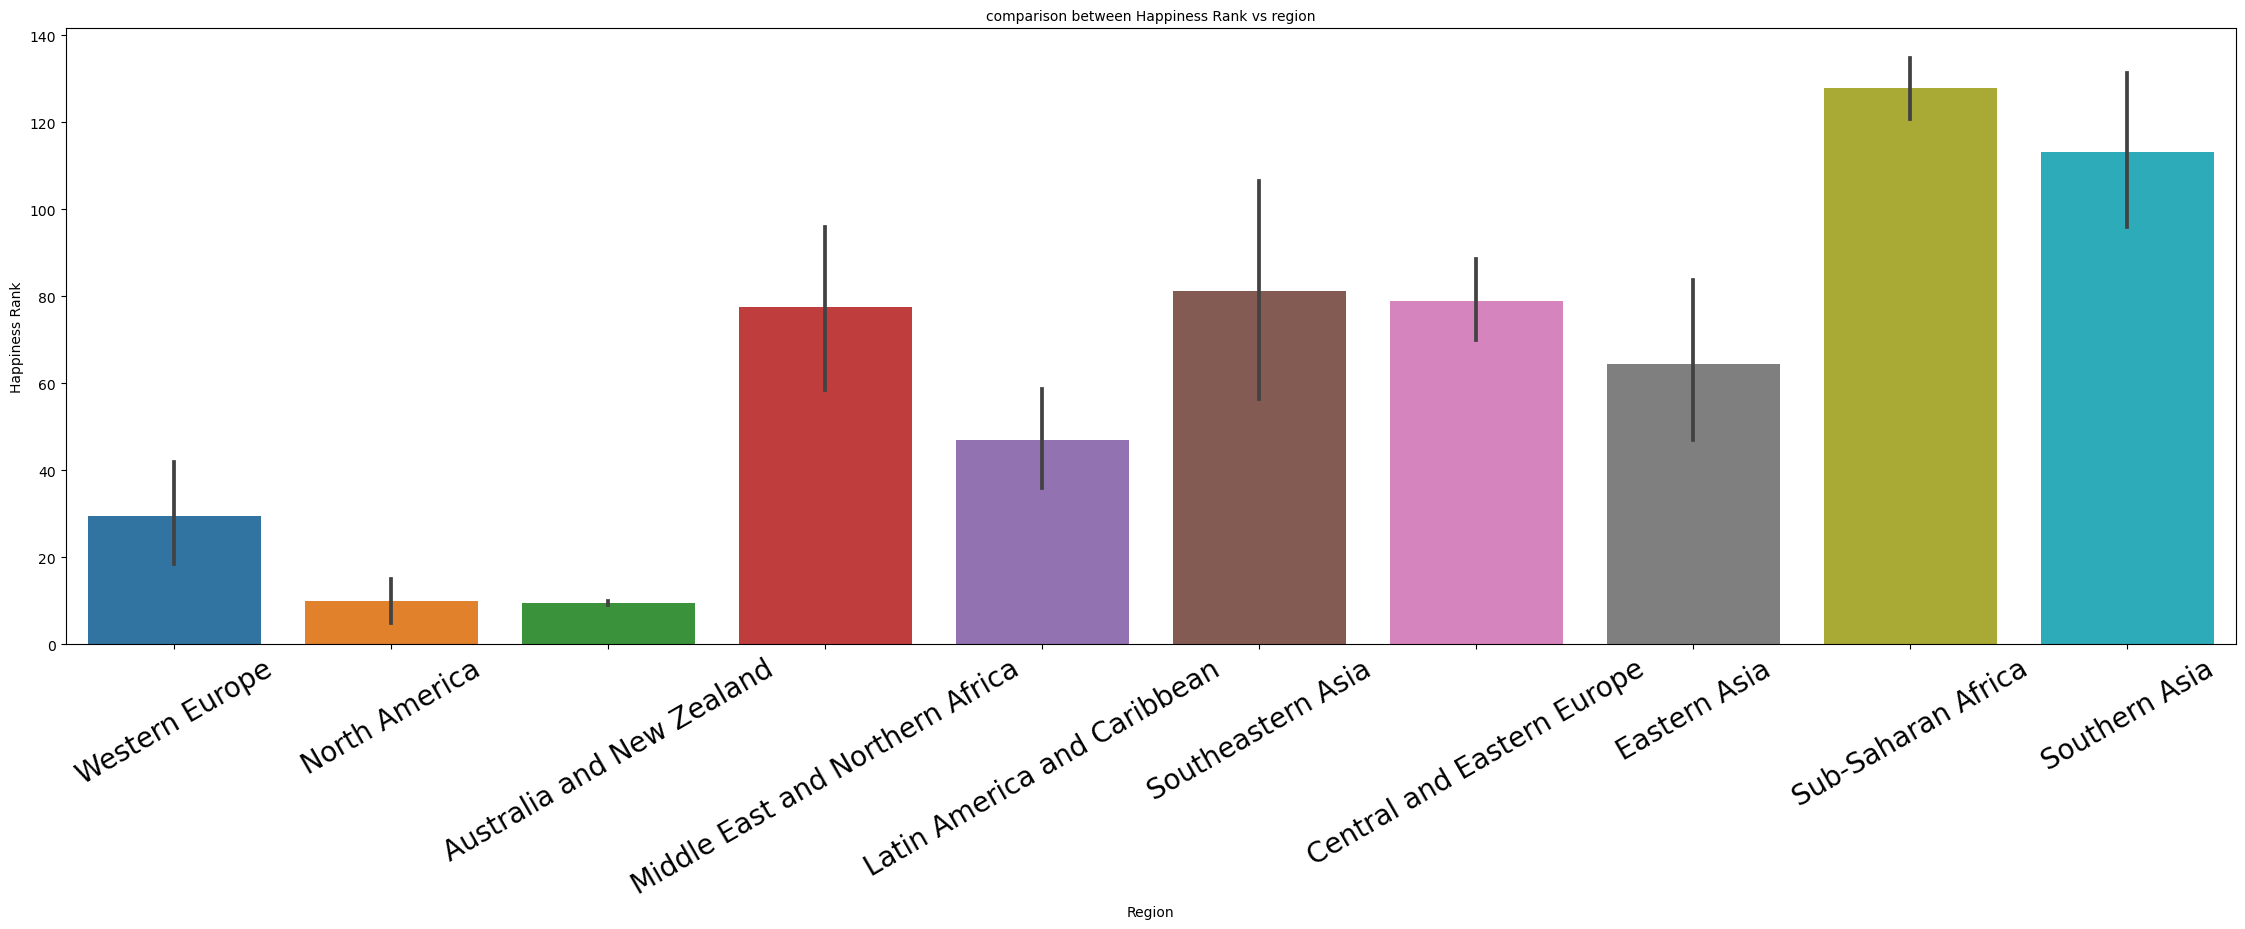

In [13]:
plt.figure(figsize=(28,8))
sns.barplot(x='Region', y = "Happiness Rank", data=df1)
plt.title("comparison between Happiness Rank vs region", size = 10)
plt.xticks(rotation = 30, size ='20')
plt.show()

we can notice that as per the rank sub-saharan africa region has high happiness rank means happpiness is low as compared to north america has low rank means the pepole who living on that region has much happier.

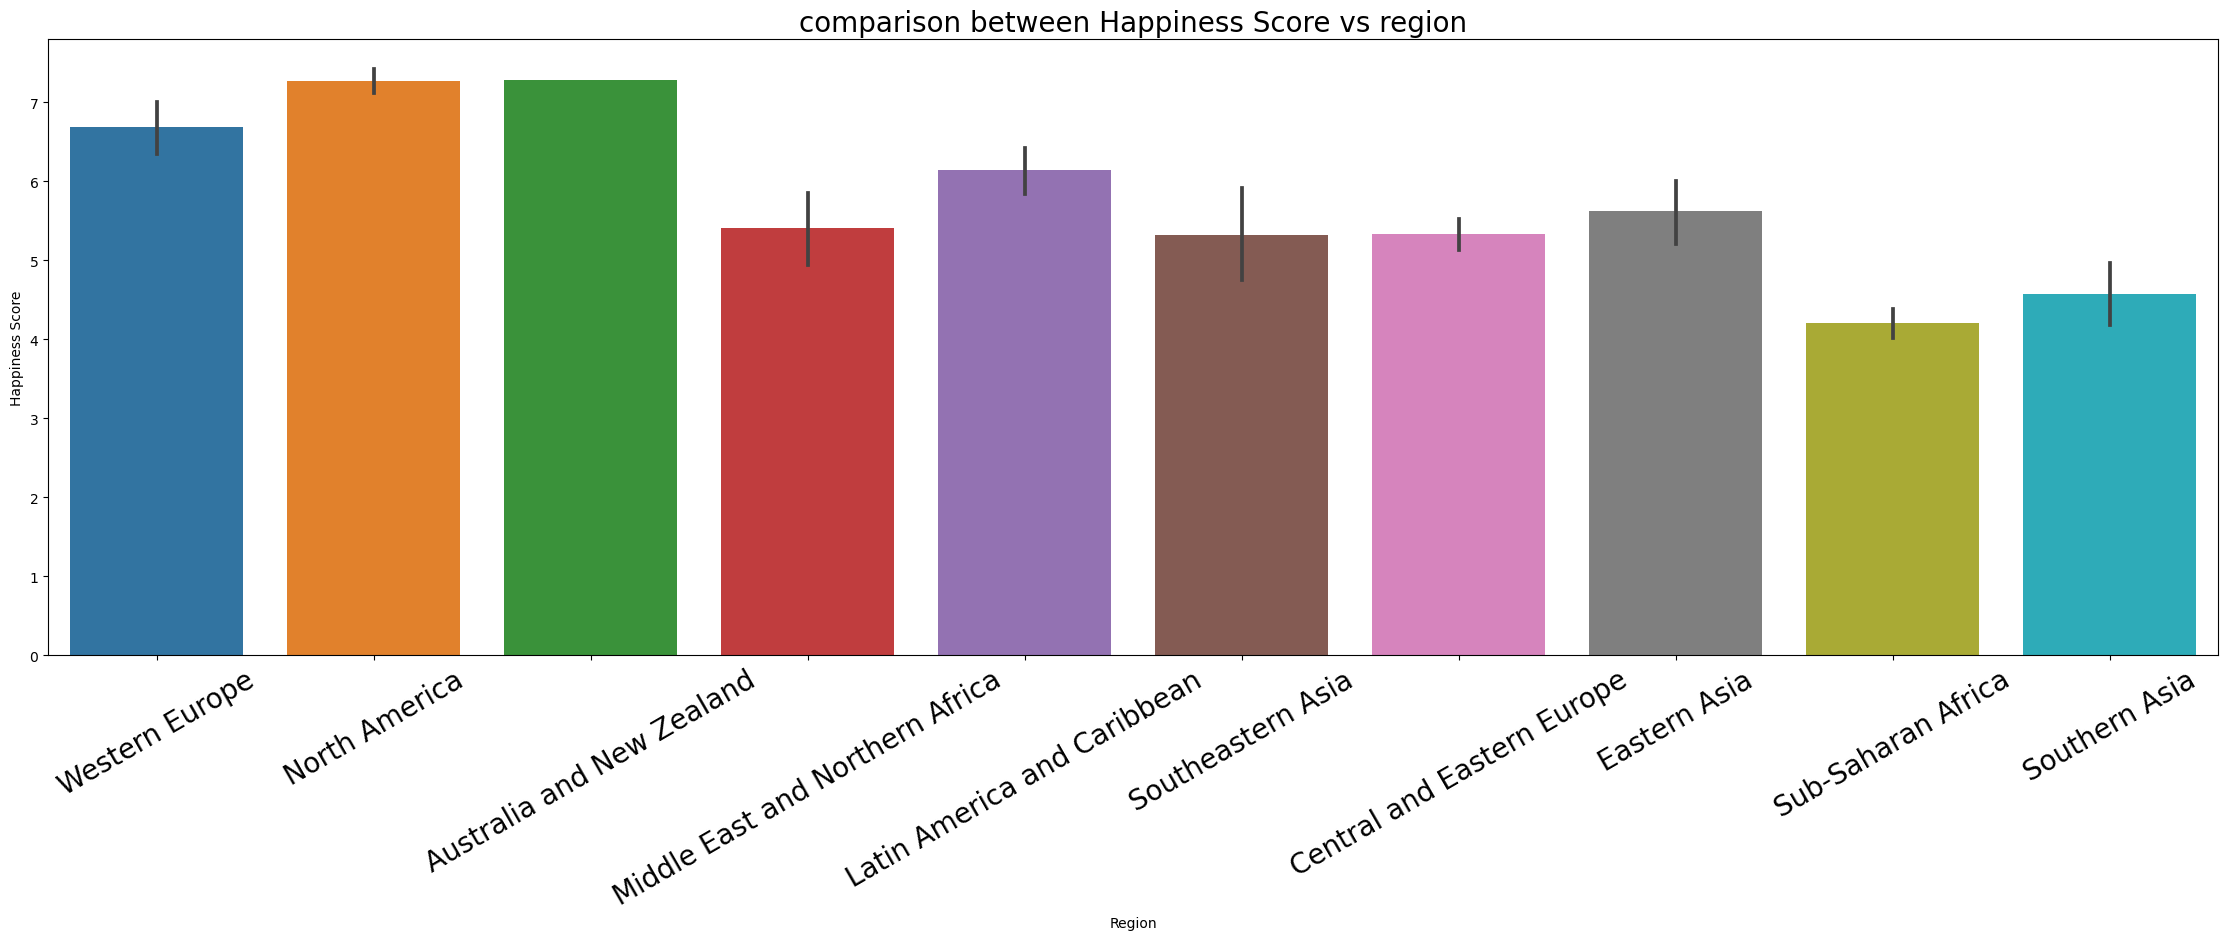

In [14]:
plt.figure(figsize=(28,8))
sns.barplot(x='Region', y = "Happiness Score", data=df1)
plt.title("comparison between Happiness Score vs region", size = '20')
plt.xticks(rotation = 30, size = '20')
plt.show()

happiness score in low means the people of that region is not much happier.

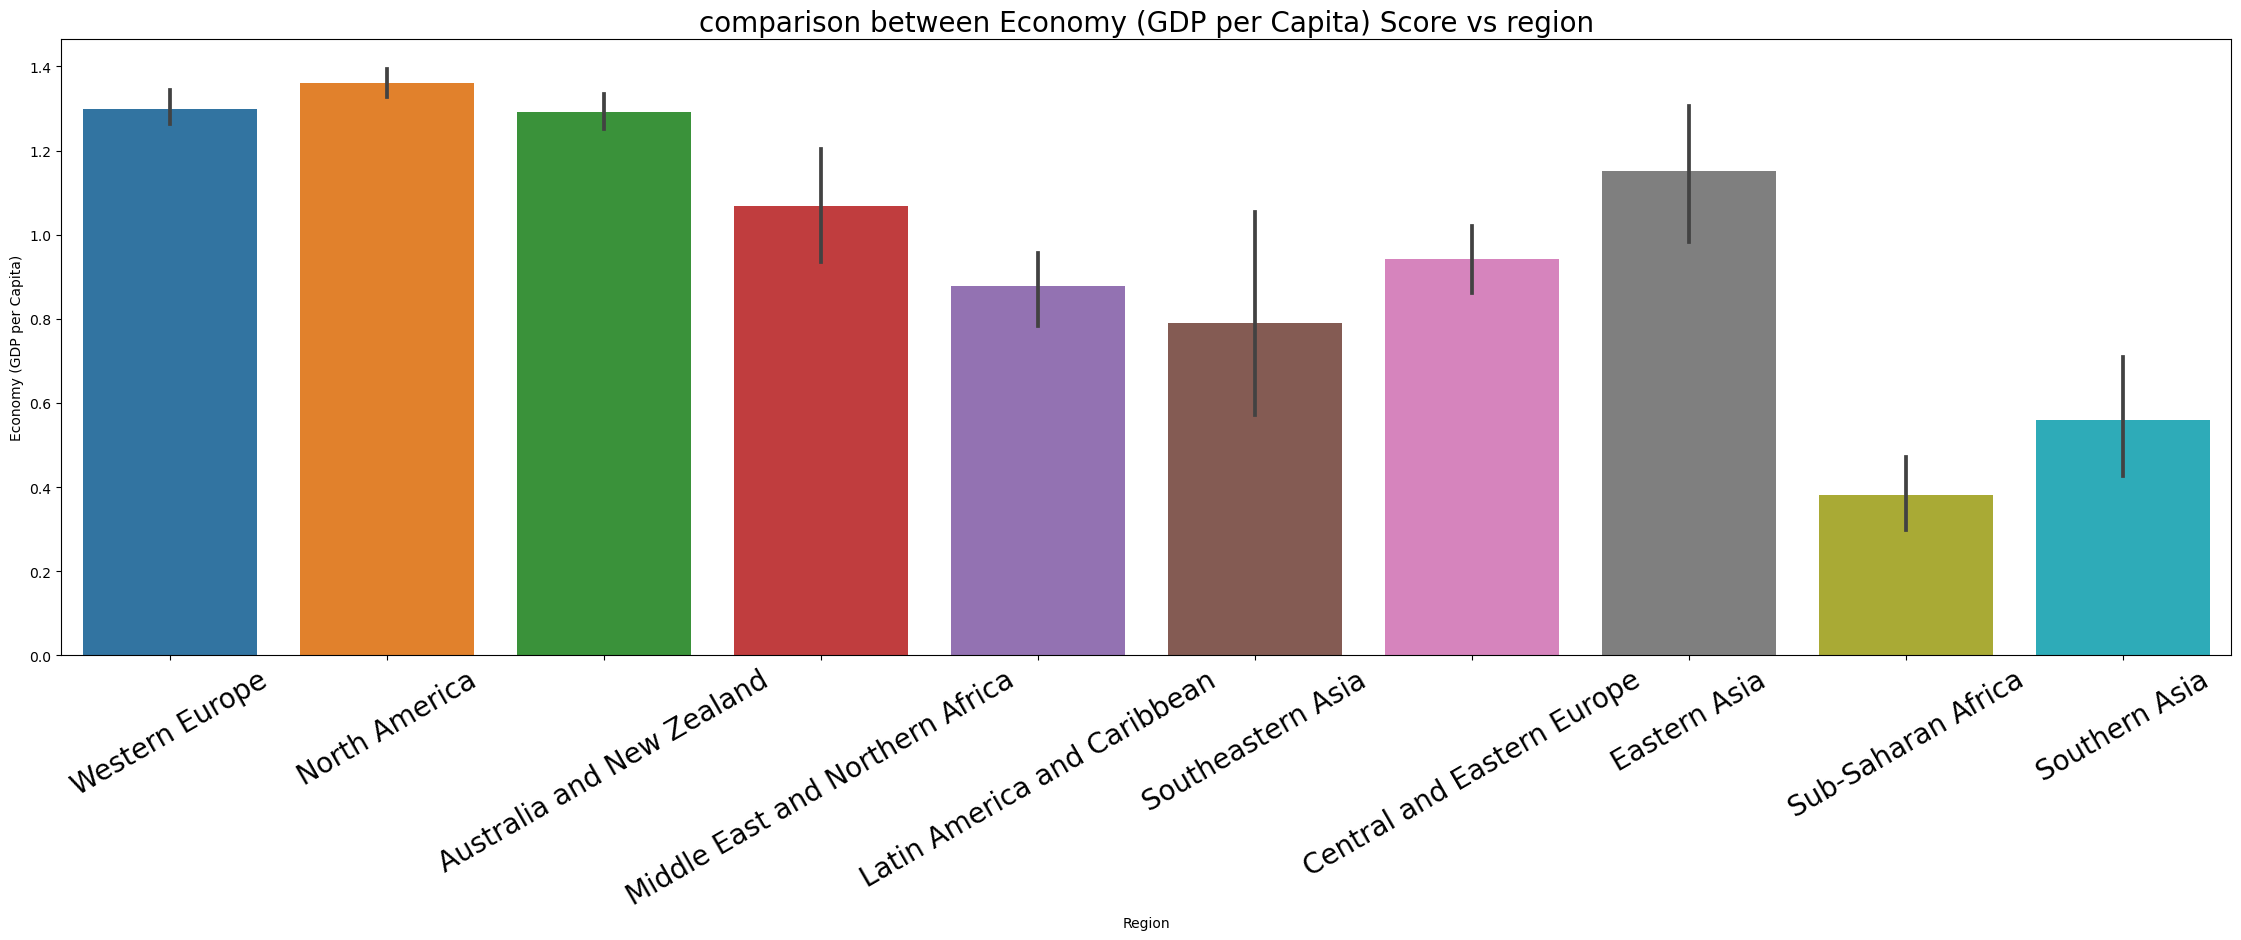

In [15]:
plt.figure(figsize=(28,8))
sns.barplot(x='Region', y = "Economy (GDP per Capita)", data=df1)
plt.title("comparison between Economy (GDP per Capita) Score vs region", size = '20')
plt.xticks(rotation = 30, size = '20')
plt.show()

In [16]:
GDP_region = df1.groupby('Region')["Economy (GDP per Capita)"].sum()
GDP_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

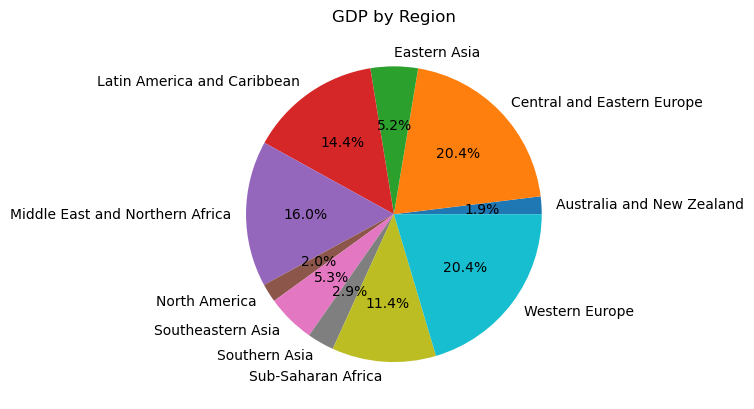

In [17]:
GDP_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

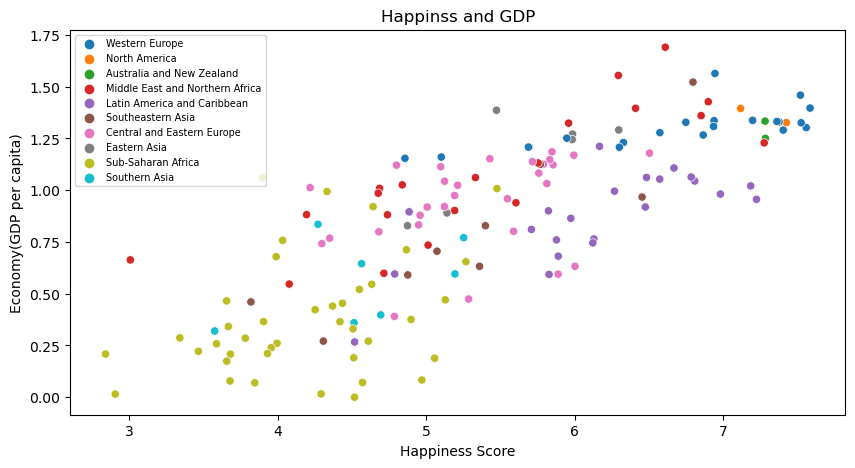

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Happiness Score', y= 'Economy (GDP per Capita)', hue='Region', data = df1)
plt.title('Happinss and GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per capita)')
plt.legend(loc = 'upper left', fontsize  = '7')

In [19]:
total_country = df1.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


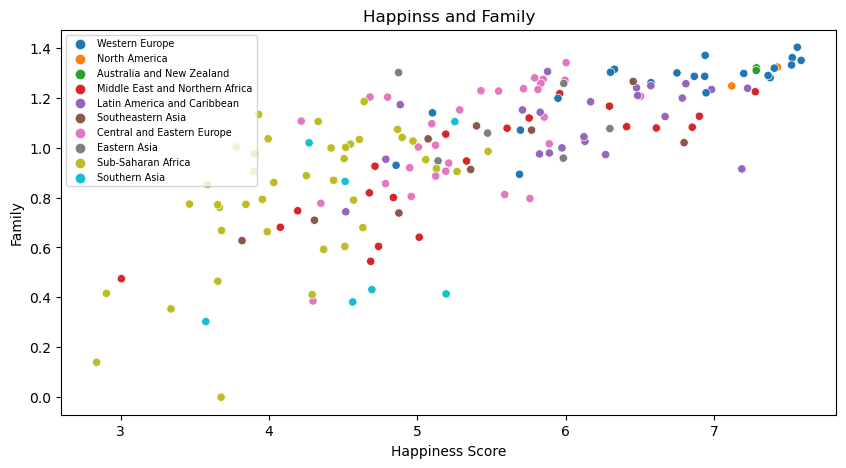

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Happiness Score', y= 'Family', hue='Region', data = df1)
plt.title('Happinss and Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.legend(loc = 'upper left', fontsize  = '7')

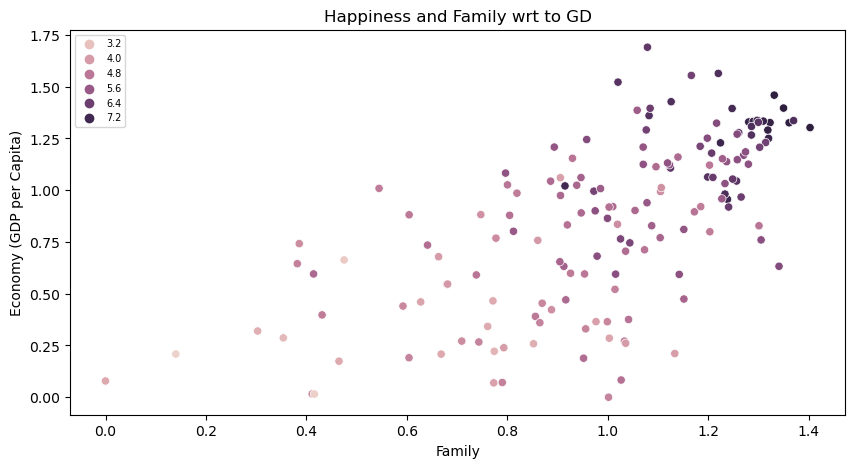

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Family', y= 'Economy (GDP per Capita)', hue='Happiness Score', data = df1)
plt.title('Happiness and Family wrt to GD')
plt.ylabel('Economy (GDP per Capita)')
plt.xlabel('Family')
plt.legend(loc = 'upper left', fontsize  = '7')

In [22]:
corruption = df1.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Text(0.5, 1.0, 'corruption in various regions')

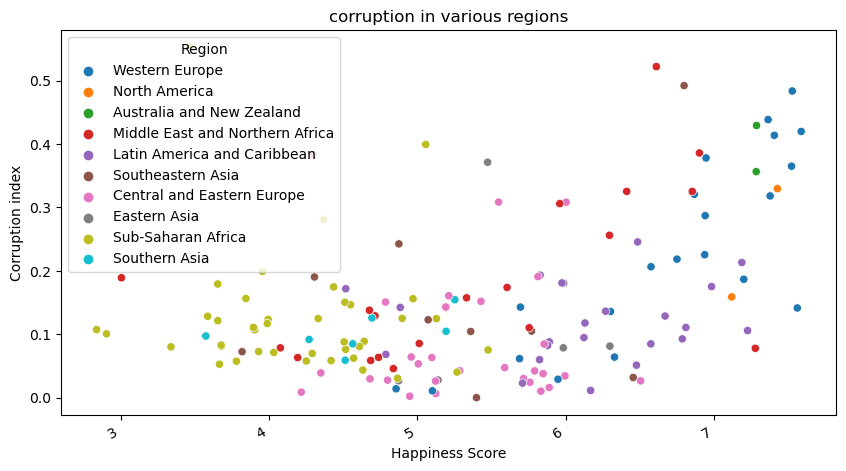

In [23]:
plt.figure(figsize= (10,5))
sns.scatterplot(x = 'Happiness Score', y = 'Trust (Government Corruption)',hue = 'Region', data= df1)
plt.xlabel('Happiness Score')
plt.ylabel('Corruption index')
plt.xticks(rotation=30 ,ha = 'right')
plt.title('corruption in various regions')

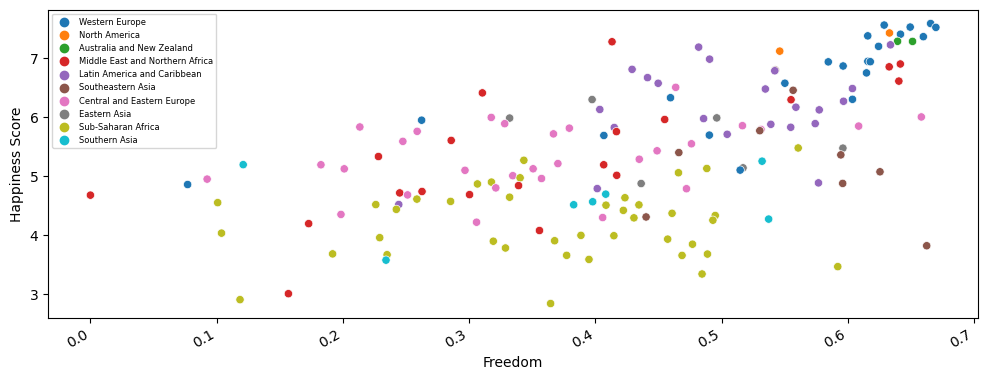

In [24]:
plt.figure(figsize= (12,4))
sns.scatterplot(x = 'Freedom', y = 'Happiness Score',hue = 'Region', data= df1)
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.xticks(rotation=30 ,ha = 'right')
plt.legend(loc = 'upper left',fontsize = '6')

In [25]:
top_10 = df1.head(10)
bottom_10 = df1.tail(10)

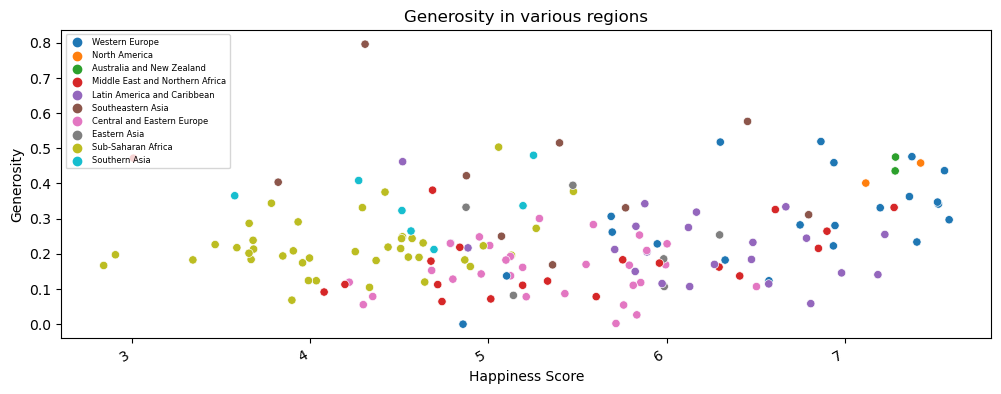

In [26]:
plt.figure(figsize= (12,4))
sns.scatterplot(x = 'Happiness Score', y = 'Generosity',hue = 'Region', data= df1)
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.xticks(rotation=30 ,ha = 'right')
plt.title('Generosity in various regions')
plt.legend(loc = 'upper left', fontsize = '6')

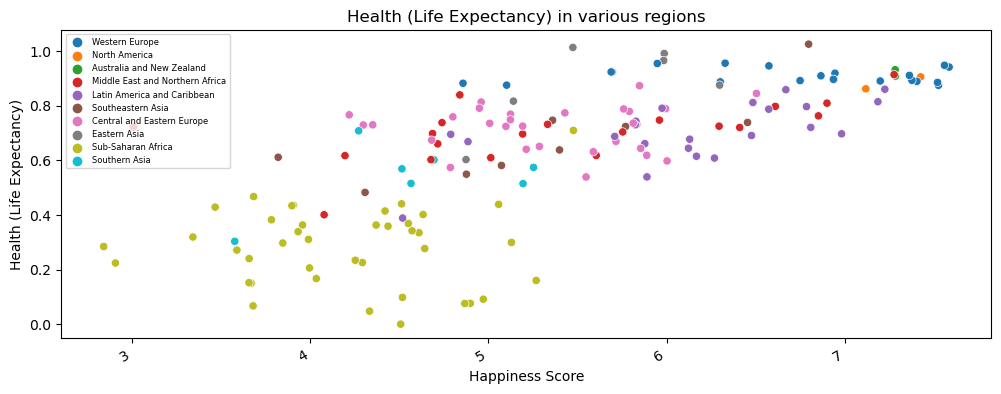

In [27]:
plt.figure(figsize= (12,4))
sns.scatterplot(x = 'Happiness Score', y = 'Health (Life Expectancy)',hue = 'Region', data= df1)
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.xticks(rotation=30 ,ha = 'right')
plt.title('Health (Life Expectancy) in various regions')
plt.legend(loc = 'upper left', fontsize = '6')

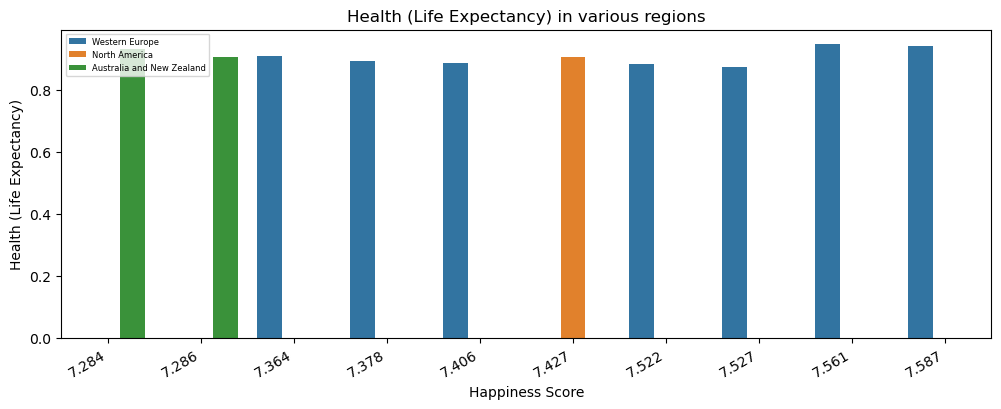

In [28]:
plt.figure(figsize= (12,4))
sns.barplot(x = 'Happiness Score', y = 'Health (Life Expectancy)',hue = 'Region', data= top_10)
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.xticks(rotation=30 ,ha = 'right')
plt.title('Health (Life Expectancy) in various regions')
plt.legend(loc = 'upper left', fontsize = '6')

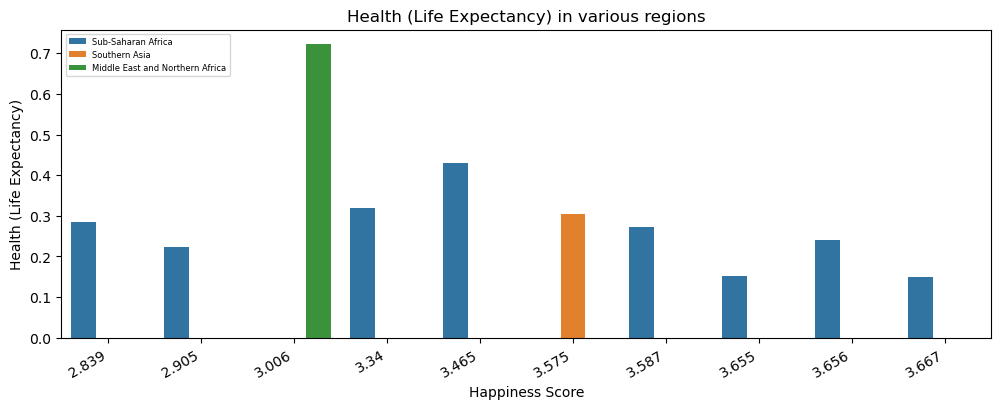

In [29]:
plt.figure(figsize= (12,4))
sns.barplot(x = 'Happiness Score', y = 'Health (Life Expectancy)',hue = 'Region', data= bottom_10)
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.xticks(rotation=30 ,ha = 'right')
plt.title('Health (Life Expectancy) in various regions')
plt.legend(loc = 'upper left', fontsize = '6')

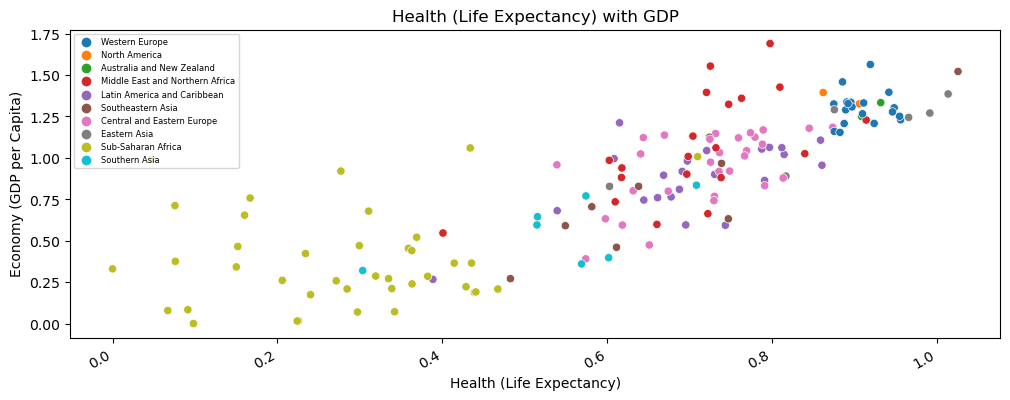

In [30]:
plt.figure(figsize= (12,4))
sns.scatterplot(x = 'Health (Life Expectancy)', y = 'Economy (GDP per Capita)',hue = 'Region', data= df1)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Economy (GDP per Capita)')
plt.xticks(rotation=30 ,ha = 'right')
plt.title('Health (Life Expectancy) with GDP')
plt.legend(loc = 'upper left', fontsize = '6')

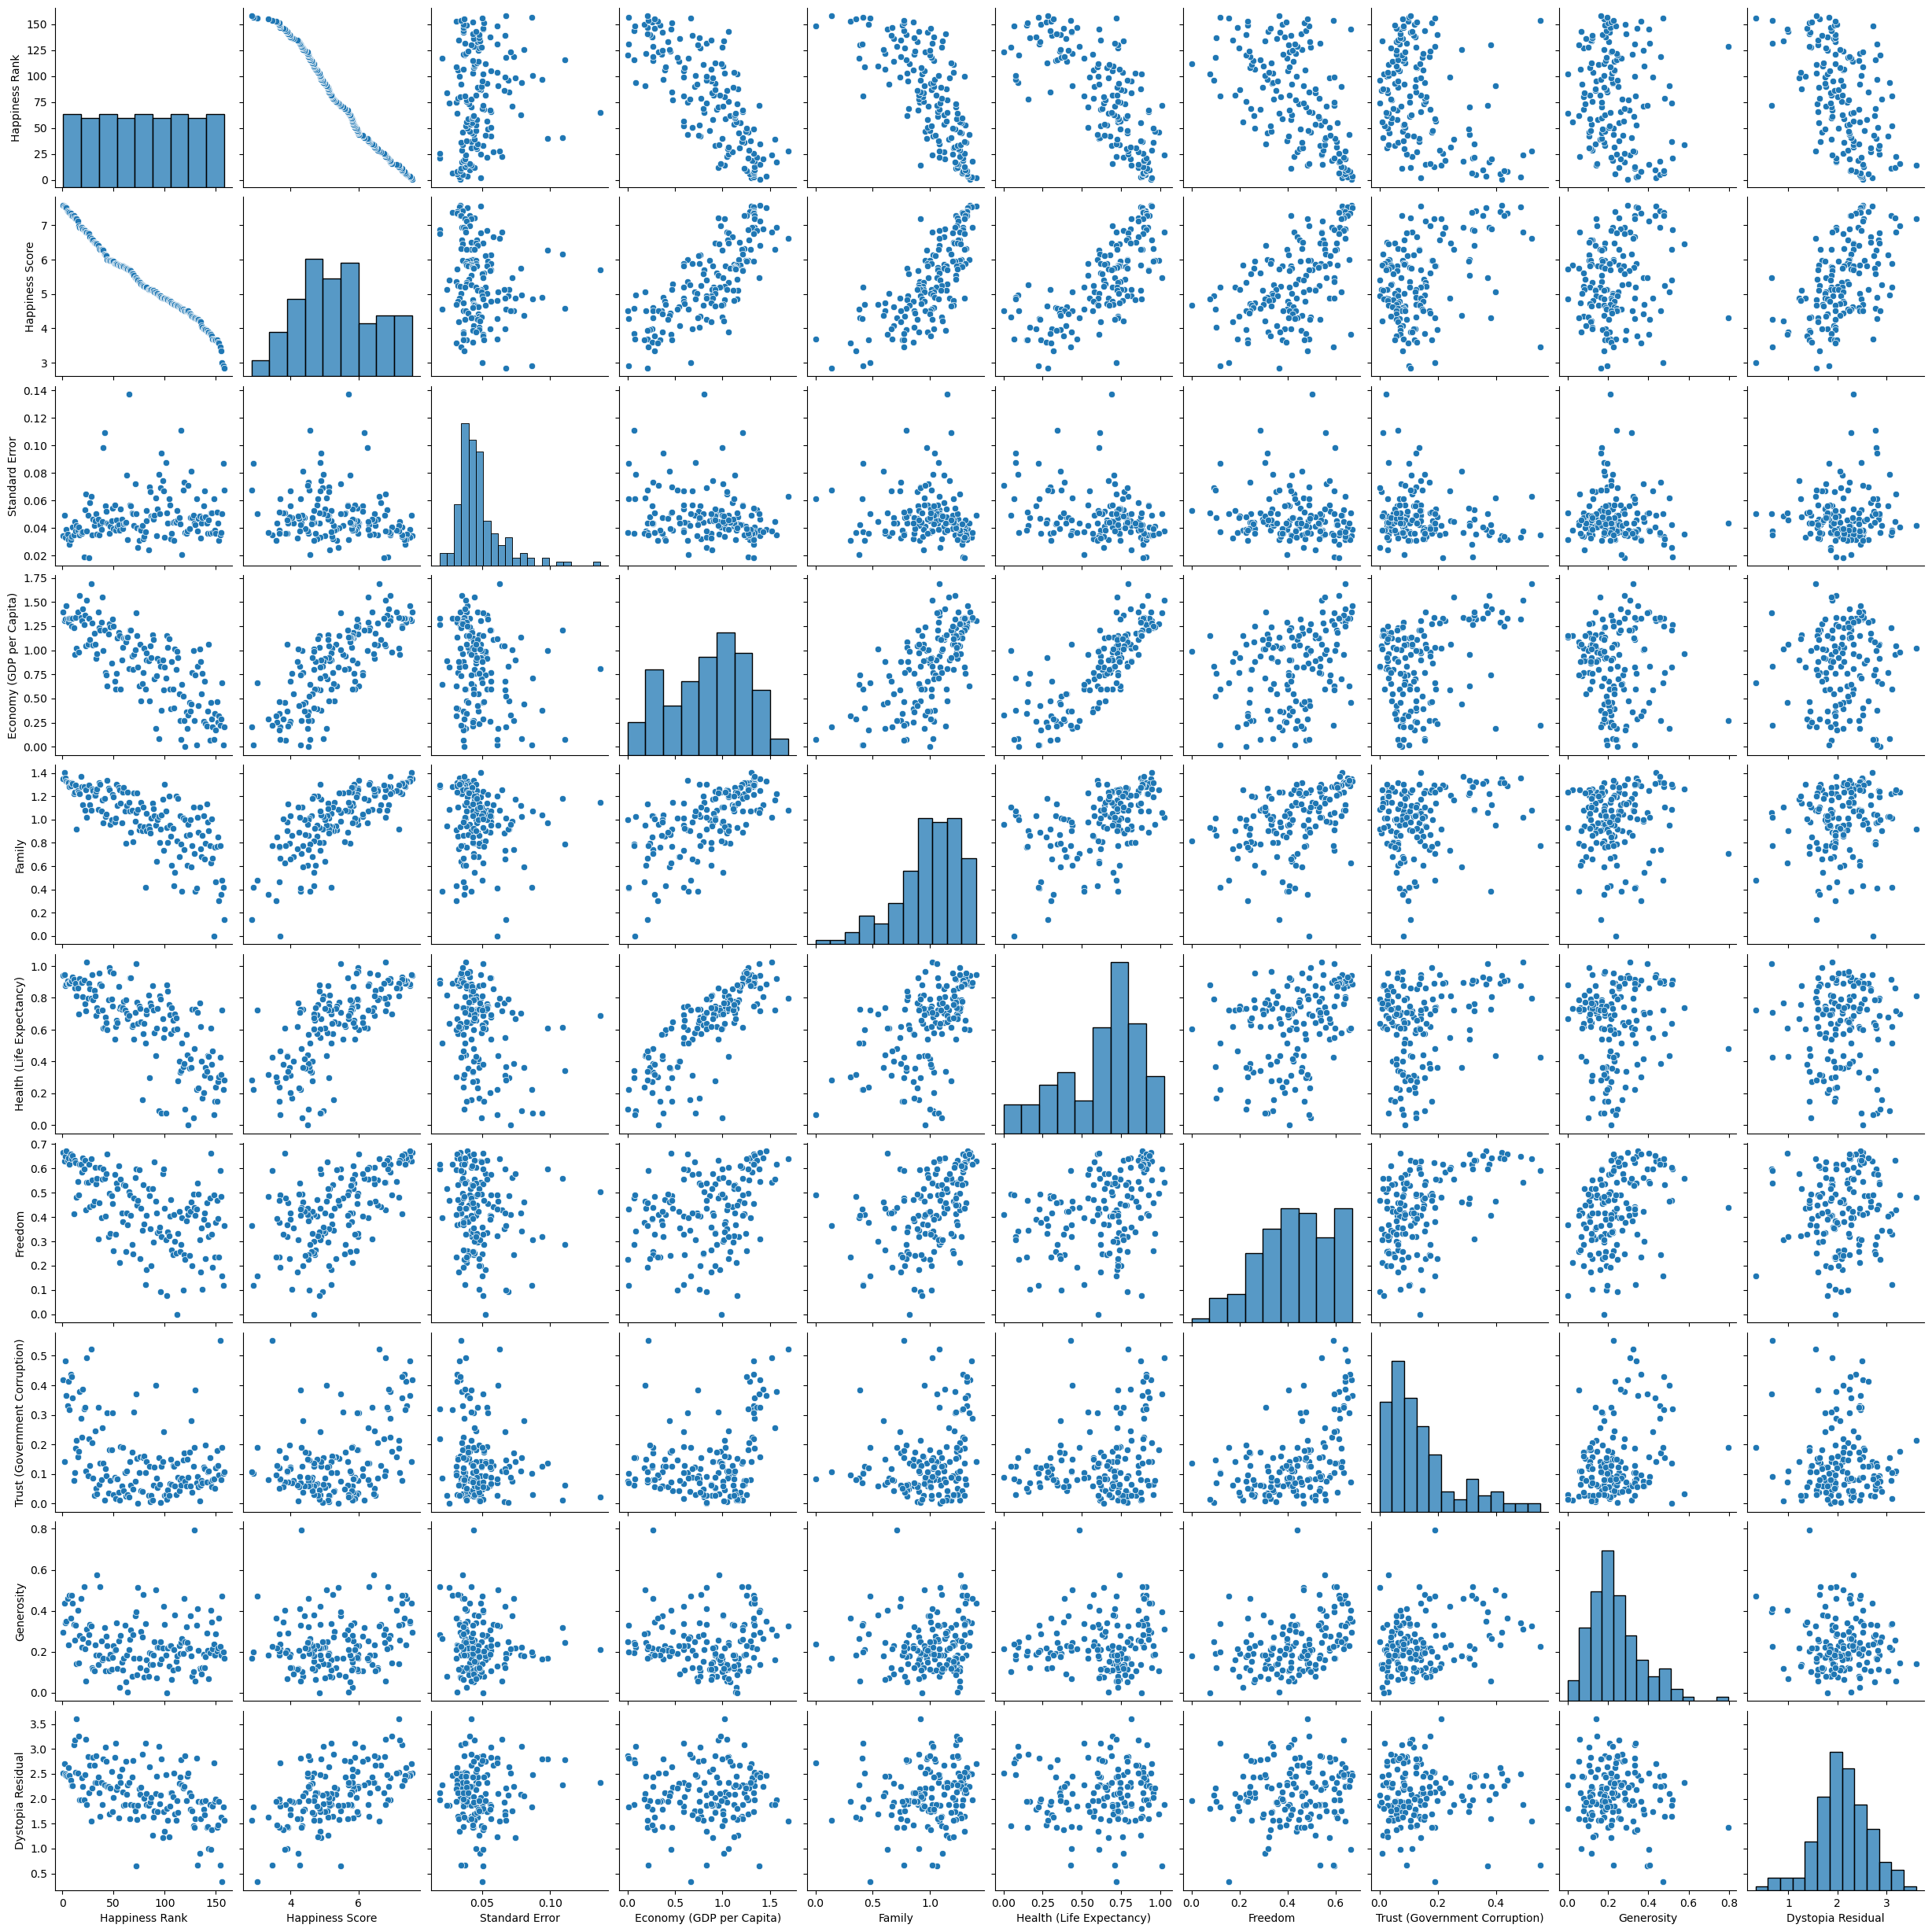

In [31]:
sns.pairplot(data=df1, palette = 'Dark2')

In [32]:
df1.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


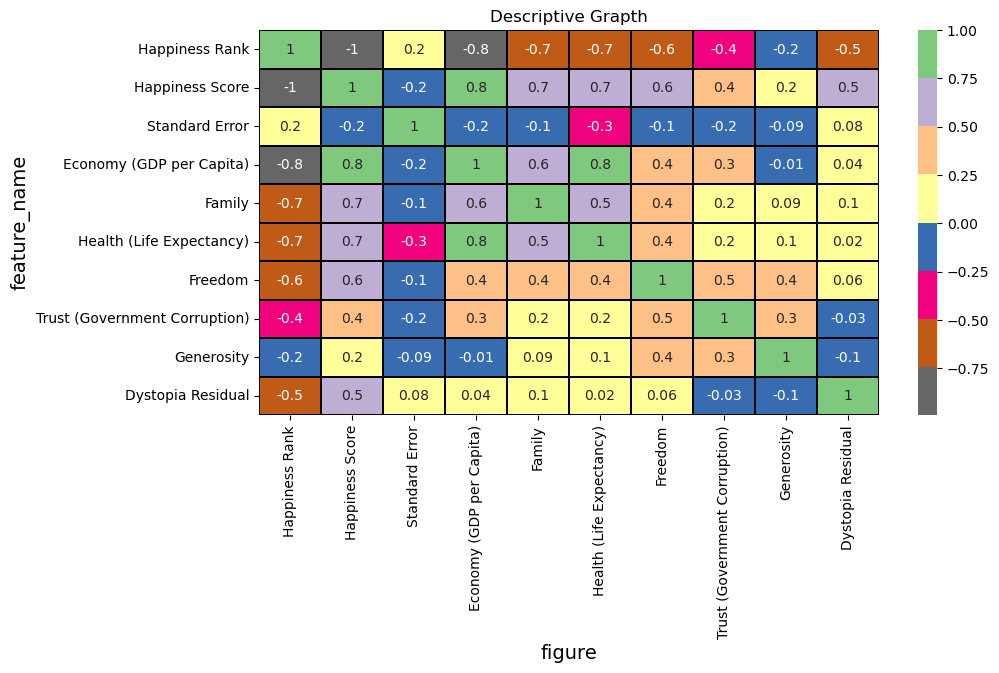

In [33]:
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(), linewidths =0.1,fmt= '0.1g', linecolor = 'black',annot = True, cmap = 'Accent_r')
plt.xlabel('figure',fontsize = 14)
plt.ylabel('feature_name', fontsize= 14)
plt.title('Descriptive Grapth')
plt.show()

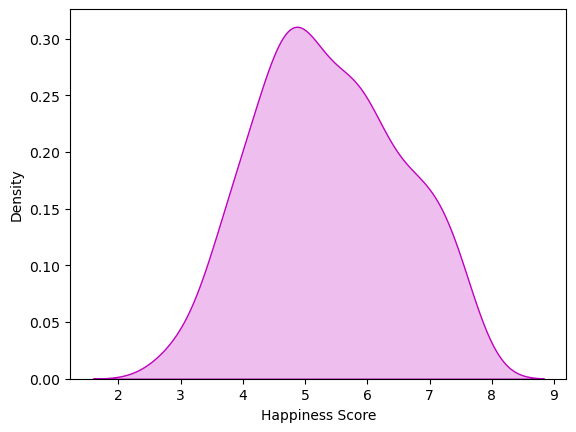

In [34]:
sns.distplot(df1['Happiness Score'], color='m',kde_kws = {"shade":True}, hist = False)
plt.show()

In [35]:
object_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]== "object":
        object_col.append(i)
int_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="object":
        int_col.append(i)

In [36]:
int_col

['Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [37]:
object_col

['Country', 'Region']

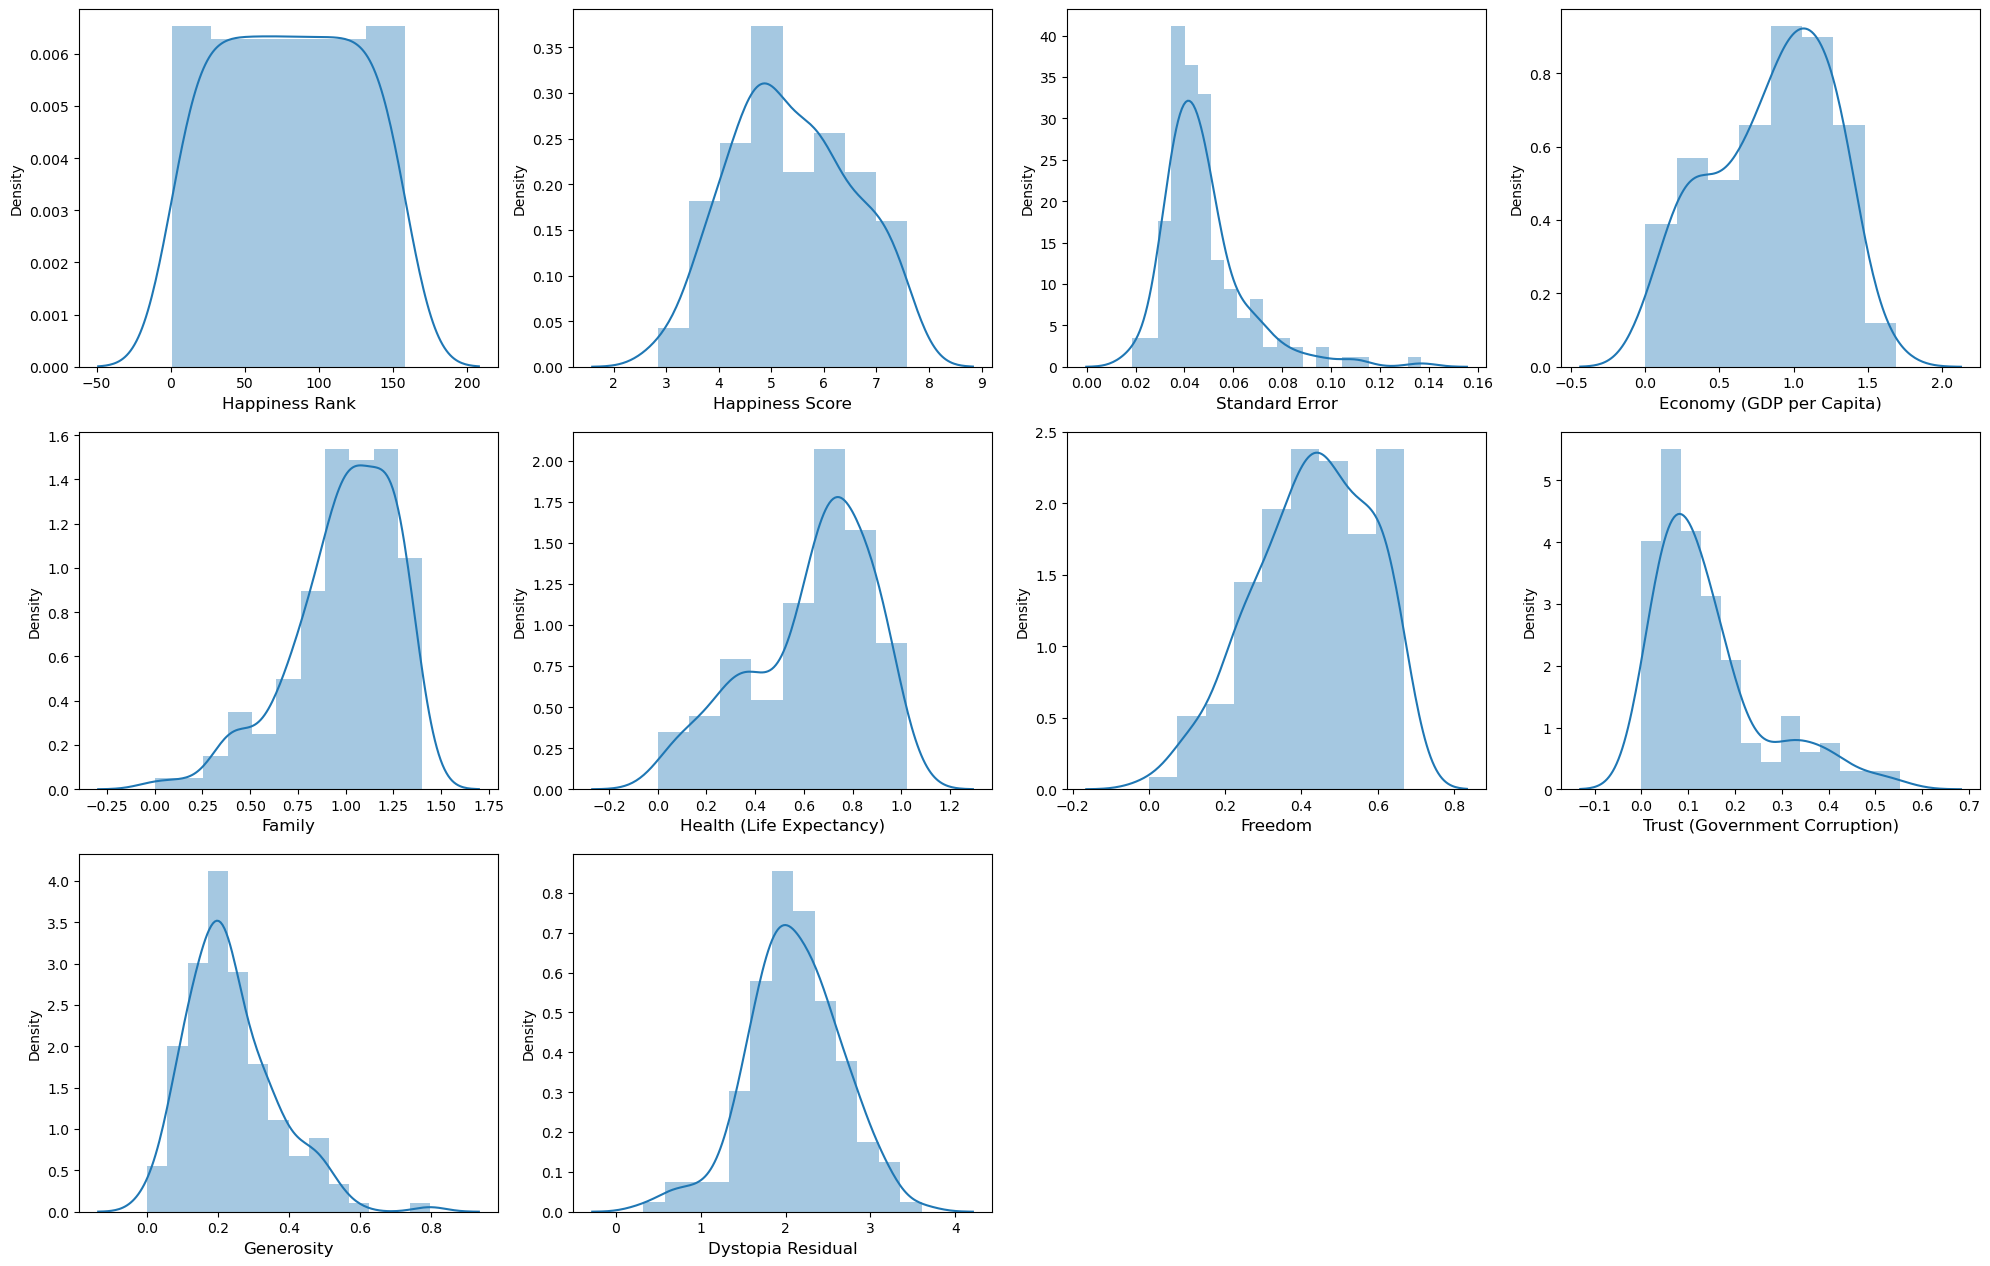

In [38]:
plt.figure(figsize= (20,25), facecolor = 'white')
plotnumber = 1
for col in int_col:
    if plotnumber<=20:
        ax= plt.subplot(6,4, plotnumber)
        sns.distplot([df1[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout()

all the graph is good. tey all have normal distrubuted.
only some grpah have some outliers or we can say positive skewed as well as neative skewed.
1. As we notice column:-
->Standard Error                   
->Trust (Government Corruption) are highly skewed.

In [39]:
df1.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

generally the acceptance range is -0.5 to 0.5
here standard error, family and trust and generosity has 1 value. 
so we have to remove the skewenwss.
Standard Error,
Family,
Trust (Government Corruption),
Generosity are highly skewed.

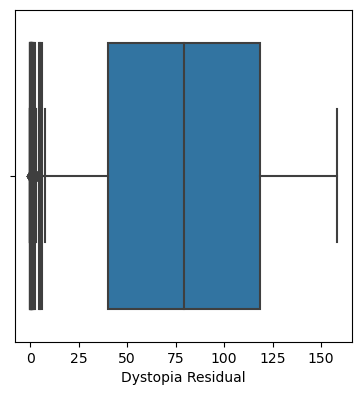

In [40]:
plt.figure(figsize = (20,25), facecolor = 'white')
p = 1
for i in int_col:
    if p <= 20:
        ax = plt.subplot(5,4, p)
        sns.boxplot(df1[i])
        plt.xlabel(i)

p +=1
plt.show()       

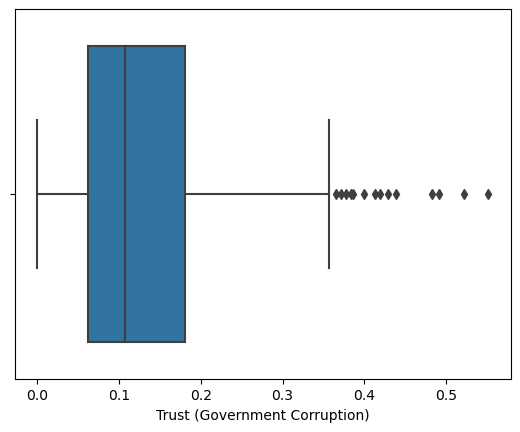

In [41]:
sns.boxplot(df1['Trust (Government Corruption)'])
plt.show()

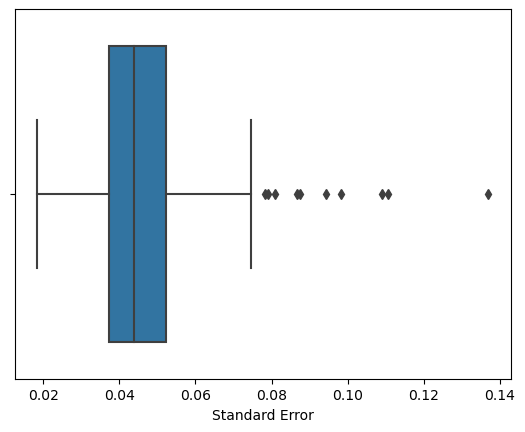

In [42]:
sns.boxplot(df1['Standard Error'])
plt.show()

now we have proof that there must be outliers in Standard Error and corruption columns.

In [43]:
from scipy.stats import zscore
out_features = df1[['Family','Generosity','Trust (Government Corruption)','Standard Error']]
z= np.abs(zscore(out_features))

In [44]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64),
 array([2, 3, 3, 3, 1, 0, 2, 0], dtype=int64))

In [45]:
z.iloc[147,0]

3.65018347485875

In [46]:
df2 = df1[(z<3).all(axis= 1)]
df2.shape

(150, 12)

In [47]:
print('old Dataframe- ',df1.shape[0])
print('new Dataframe- ',df2.shape[0])

old Dataframe-  158
new Dataframe-  150


In [48]:
print('data loss percentage- ', ((df1.shape[0]-df2.shape[0])/df1.shape[0]*100))

data loss percentage-  5.063291139240507


the acceptable limit for the data loss is 4.5 but it depend on our data.
our data is small. this is not acceptable range as per he data.

In [49]:
#removing skewness:-
df1[['Standard Error','Trust (Government Corruption)','Generosity']]=np.sqrt(df1[['Standard Error','Trust (Government Corruption)','Generosity']])

In [50]:
df1.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.225889
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

In [51]:
#correlation after removing outliers
df1_corr=df1.corr()
df1_corr['Happiness Score']

Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.196486
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.354664
Generosity                       0.170428
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

as we again notice that standard error is highely skewed. 
family,health and gereosity is lillte skewed.
if we remove skewness from column those are highly correlated with target variable that can affect 
         the correlation of these columns so we only remove the skewness from those column, 
         those are skewed and less correlated with target variable 

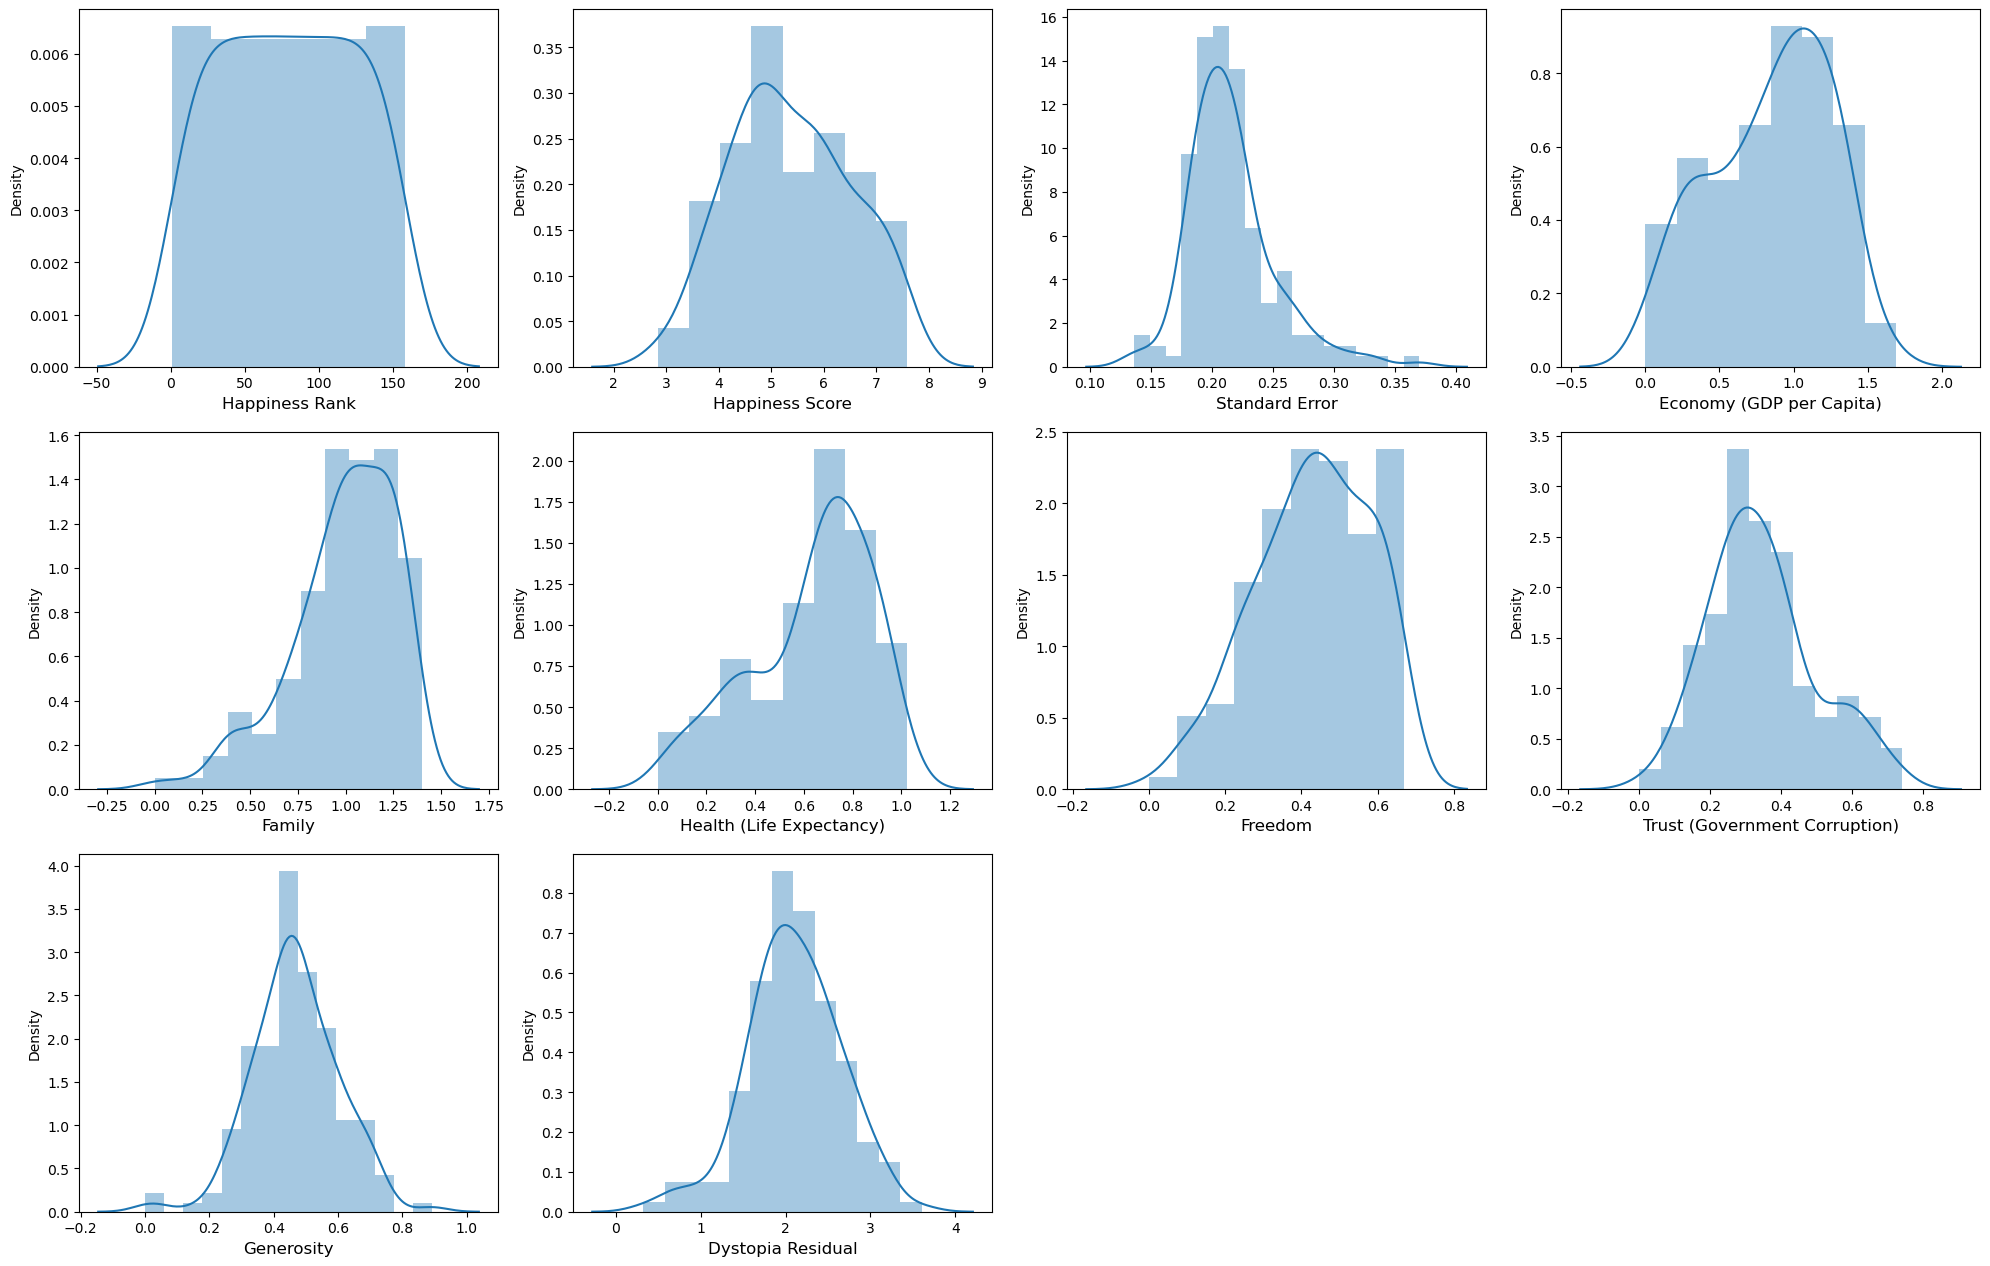

In [52]:
plt.figure(figsize= (20,25), facecolor = 'white')
plotnumber = 1
for col in int_col:
    if plotnumber<=20:
        ax= plt.subplot(6,4, plotnumber)
        sns.distplot([df1[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout()

now graph is ok.

In [53]:
df1.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.177066,-0.785267,-0.733644,-0.735613,-0.556886,-0.332354,-0.151674,-0.521999
Happiness Score,-0.992105,1.000000,-0.196486,0.780966,0.740605,0.724200,0.568211,0.354664,0.170428,0.530474
Standard Error,0.177066,-0.196486,1.000000,-0.223413,-0.130123,-0.319857,-0.152114,-0.172709,-0.066509,0.068663
Economy (GDP per Capita),-0.785267,0.780966,-0.223413,1.000000,0.645299,0.816478,0.370300,0.241112,-0.043087,0.040059
Family,-0.733644,0.740605,-0.130123,0.645299,1.000000,0.531104,0.441518,0.158574,0.076005,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.319857,0.816478,0.531104,1.000000,0.360477,0.183468,0.069038,0.018979
Freedom,-0.556886,0.568211,-0.152114,0.370300,0.441518,0.360477,1.000000,0.479812,0.395946,0.062783
Trust (Government Corruption),-0.332354,0.354664,-0.172709,0.241112,0.158574,0.183468,0.479812,1.000000,0.276274,-0.002489
Generosity,-0.151674,0.170428,-0.066509,-0.043087,0.076005,0.069038,0.395946,0.276274,1.000000,-0.075295
Dystopia Residual,-0.521999,0.530474,0.068663,0.040059,0.148117,0.018979,0.062783,-0.002489,-0.075295,1.000000


# Dividing the data into x aand y 
label and features

In [59]:
drop_columns = ['Happiness Score', 'Happiness Rank','Country', 'Region',]

In [60]:
x= df1.drop(columns = drop_columns, axis=1)
y= df1['Happiness Score']
print('feature dia = ', x.shape)
print('label dia = ', y.shape)

feature dia =  (158, 8)
label dia =  (158,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [62]:
# feature scaling using standard scalurization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.875515,1.369621,1.320281,1.263408,1.577438,1.994534,0.572055,0.758258
1,0.142929,1.135226,1.514458,1.289434,1.332456,0.190088,1.440806,1.092857
2,-0.938931,1.192861,1.361054,0.992229,1.469659,2.309792,0.868586,0.712335
3,-0.530836,1.525130,1.251922,1.035145,1.605131,1.704241,0.904406,0.663893
4,-0.768784,1.194876,1.221204,1.118054,1.360416,1.504447,1.563200,0.639337
...,...,...,...,...,...,...,...,...
153,-0.835423,-1.552987,-0.800520,-0.818610,1.087740,2.625227,0.053557,-2.588925
154,-0.692695,-1.392303,-2.346860,-1.263362,0.372033,-0.427838,-0.309478,-0.843967
155,0.225513,-0.455245,-1.901086,0.372199,-1.809238,0.579860,1.638487,-3.208430
156,2.197472,-2.067566,-2.118467,-1.649648,-2.064472,-0.200879,-0.183139,-0.481985


we have scaled the data by using StandardScaler to overcome the issue of biasness.

In [64]:
#To check multi co-linearity

In [ ]:
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

In [65]:
vif = pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,vif values,Features
0,1.146995,Standard Error
1,4.088554,Economy (GDP per Capita)
2,1.951524,Family
3,3.340709,Health (Life Expectancy)
4,1.809320,Freedom
5,1.390997,Trust (Government Corruption)
6,1.318726,Generosity
7,1.046555,Dystopia Residual


vif threshold value is betwwn 5,10 generally we consider as that.
if value is 1----> not correlated with column
if value is 4----> 4 times it is corelated iwth features whaen there was no multicollinearity.
so there is no multicollinearity issue here.

In [66]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
MaxAccu = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = i)
    
LR = LinearRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
acc = r2_score(y_test,pred)

if acc>MaxAccu:
    MaxAccu = acc
    maxRS = i
    
print("Best r2 is", MaxAccu, "at random state", maxRS)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxaccu = 0
maxrs = 0

for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
acc = r2_score(y_test,pred)

if acc>maxaccu:
    maxaccu =acc
    maxrs = i
print("Best r2 is", maxaccu,"at random state" , maxrs)

Best r2 is 0.9976850449864091 at random state 399


In [ ]:
# creating train test split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = maxrs)

In [70]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_lr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_lr))
print('mean square error:-', mean_squared_error(y_test, pred_lr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_lr)))

r2_score: 0.9976850449864091
r2_Score on training data: 99.88367799695534
mean absolute error:- 0.03150250355287344
mean square error:- 0.0029365557247824467
root mean square error:- 0.05418999653794459




if our r2 is negative it means our model is not fitting well in our data. but our r2 is positive.

lets check via graph

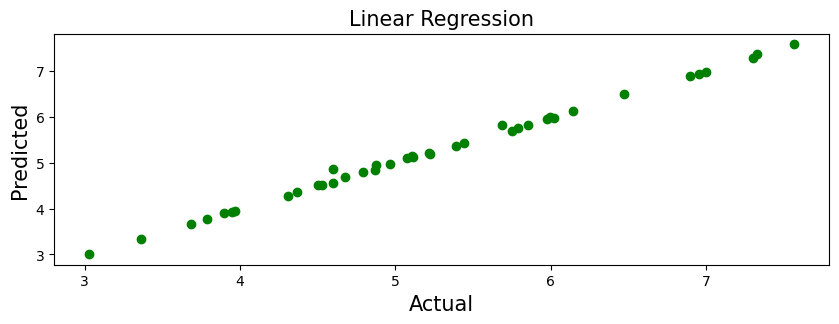

In [72]:
plt.figure(figsize = (10,3))
plt.scatter(x= pred_lr, y = y_test, color = 'g')
plt.xlabel('Actual', fontsize= 15)
plt.ylabel('Predicted', fontsize = 15)
plt.title('Linear Regression', fontsize = 15)
plt.show()

lets check with other model.

In [73]:
print('Random Forest Regressor')
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_RFR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_RFR))
print('mean square error:-', mean_squared_error(y_test, pred_RFR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('\n','*'*100,'\n')

print('Extra Trees Regressor')
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_etr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_etr))
print('mean square error:-', mean_squared_error(y_test, pred_etr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_etr)))
print('\n','*'*100,'\n')

print('Decision Tree Regressor')
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
pred_train = DTR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_DTR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_DTR))
print('mean square error:-', mean_squared_error(y_test, pred_DTR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_DTR)))

print('Gradient Boosting Regressor')
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
pred_train = etr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_gbr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_gbr))
print('mean square error:-', mean_squared_error(y_test, pred_gbr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_gbr)))
print('\n','*'*100,'\n')

print('Bagging Regressor')
br = BaggingRegressor()
br.fit(x_train,y_train)
pred_br = br.predict(x_test)
pred_train = DTR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_br))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_br))
print('mean square error:-', mean_squared_error(y_test, pred_br))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_br)))
print('\n','*'*100,'\n')
print('SVR')
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_svr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_svr))
print('mean square error:-', mean_squared_error(y_test, pred_svr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_svr)))

Random Forest Regressor
r2_score: 0.847658494415482
r2_Score on training data: 98.5046265362037
mean absolute error:- 0.3090439999999998
mean square error:- 0.19324752218500021
root mean square error:- 0.4395992745501296

 **************************************************************************************************** 

Extra Trees Regressor
r2_score: 0.9065262425494764
r2_Score on training data: 100.0
mean absolute error:- 0.24127900000000077
mean square error:- 0.11857288627500036
root mean square error:- 0.34434413930688634

 **************************************************************************************************** 

Decision Tree Regressor
r2_score: 0.790954699854117
r2_Score on training data: 100.0
mean absolute error:- 0.38869999999999993
mean square error:- 0.26517715
root mean square error:- 0.5149535415938024
Gradient Boosting Regressor
r2_score: 0.9218728643568741
r2_Score on training data: 100.0
mean absolute error:- 0.22856101685433067
mean square error:- 0.09

In [76]:
from sklearn.neighbors import KNeighborsRegressor
print('KNeighbors Regressor')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('r2_score:', r2_score(y_test, pred_knn))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_knn))
print('mean square error:-', mean_squared_error(y_test, pred_knn))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))
print('\n','*'*100,'\n')

KNeighbors Regressor
r2_score: 0.9102789032258924
r2_Score on training data: 93.08720334056252
mean absolute error:- 0.252245
mean square error:- 0.11381257900000005
root mean square error:- 0.33736119960659383

 **************************************************************************************************** 



# Cross Validation

In [77]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_lr)-score.mean())*100)

print("random forest cv ")
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_RFR)-score.mean())*100)
print('\n','*'*100,'\n')

print("extra tree reg cv ")
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_etr)-score.mean())*100)
print('\n','*'*100,'\n')

print("Decision tree regressor cv ")
score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_DTR)-score.mean())*100)
print('\n','*'*100,'\n')

print("Gradient Boost cv ")
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_gbr)-score.mean())*100)
print('\n','*'*100,'\n')

print("BR cv ")
score = cross_val_score(br,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_br)-score.mean())*100)
print('\n','*'*100,'\n')

print(" SVR cv ")
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_svr)-score.mean())*100)
print('\n','*'*100,'\n')

print("KNN cv ")
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_knn)-score.mean())*100)
print('\n','*'*100,'\n')

[0.97199927 0.94551914 0.95731089 0.90421747 0.98780974]
0.9533712994922663
difference between r2score and cross validation score is--- 4.431374549414279
random forest cv 
[-6.99323129 -1.79047256 -0.60886438 -1.71223517 -5.68790664]
-3.3585420088331204
difference between r2score and cross validation score is--- 420.62005032486024

 **************************************************************************************************** 

extra tree reg cv 
[-6.5054589  -0.32276176 -0.7175944  -1.48005709 -4.81056813]
-2.767288058888
difference between r2score and cross validation score is--- 367.38143014374765

 **************************************************************************************************** 

Decision tree regressor cv 
[ -5.54261029  -6.71423506  -6.2067903  -10.46794026  -5.76259967]
-6.938835117375698
difference between r2score and cross validation score is--- 772.9789817229814

 ***************************************************************************************




we clearly observe that Linear regressor have less difference in R2 score. so it wii be our model.

In [78]:
param = {'alpha': [1.0,0.5,0.4,2],
        'fit_intercept':[True, False],
        'positive':[False, True],
        'random_state':[1,4,10,20],
        'solver':['auto','svd','cholesky', 'isqr','sag','saga','lbfgs']
        }
gscv =GridSearchCV(Ridge(),param, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.5, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr', 'sag',
                                    'saga', 'lbfgs']})

In [79]:
gscv.best_params_

{'alpha': 0.4,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [80]:
model =Ridge(alpha= 0.4, fit_intercept= True, 
             positive= True,
             random_state= 1,
             solver= 'auto')

In [81]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('r2_score:', r2_score(y_test, pred))

print('mean absolute error:-', mean_absolute_error(y_test, pred))
print('mean square error:-', mean_squared_error(y_test, pred))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred)))
print('\n','*'*100,'\n')

r2_score: 0.9977743690684706
mean absolute error:- 0.03153620599154914
mean square error:- 0.0028232467649975147
root mean square error:- 0.05313423345638398

 **************************************************************************************************** 



In [82]:
import pickle
file_name = 'World_Happiness_report.pkl'
pickle.dump(model,open(file_name,'wb'))

In [83]:
loaded_model = pickle.load(open('World_Happiness_report.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

99.77743690684706


In [84]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index = ["prdicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
prdicted,5.998315,5.448317,3.689049,4.607669,4.872726,5.121084,5.795948,5.389951,4.313732,3.95309,...,6.144524,5.105137,3.793063,4.968418,3.042714,3.903273,4.373048,7.295815,4.679474,5.858384
original,5.995000,5.429000,3.655000,4.857000,4.839000,5.123000,5.754000,5.360000,4.271000,3.93100,...,6.123000,5.140000,3.781000,4.971000,3.006000,3.896000,4.369000,7.278000,4.681000,5.828000
